# **Insper - Eletromagnetismo e Ondulatória** #


### **Projeto**

Grupo
- Caio Aranha
- Joseph Neto
- Leonardo França
- Rafael Leventhal

In [1]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#implemente seu código aqui
r1 = 1.528
r2 = 1.395

l1 = 0.0004698
l2 = 0.0004121

k = 0.5

c1 = 1e-7
c2 = 1e-7

rc = 100


wProj = 1/(sqrt(l1*c1))
fProj = wProj/(2*pi)
print("Frequência de Projeto = ", fProj, "Hz")


Frequência de Projeto =  (23220.07538820991+0j) Hz


150834


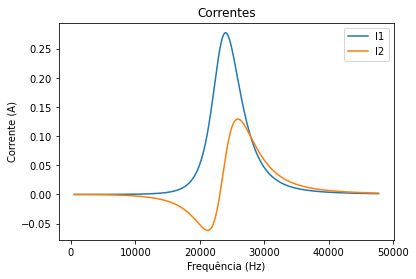

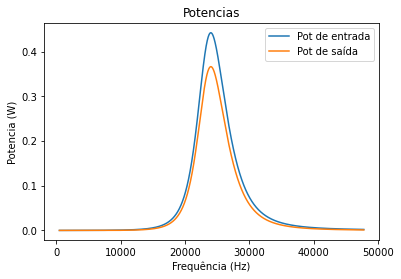

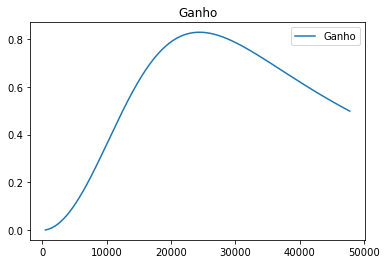

162818


In [3]:
# implemente seu código aqui
wideal = 1/(sqrt(l1*c1))

# fazer array de 1600 até 2000 com intervalos de 1
izeros = []
Is1 = []
Is2 =[]
Ps1 = []
Ps2 = []
wArray = np.arange(3200, 300000, 1)
fArray = wArray/(2*np.pi)
for w in wArray:
    k = 0.3
    m = k * ((l1*l2)**0.5)
    xc1 = (1/(1j*w*c1))
    xc2 = (1/(1j*w*c2))
    xl1 = 1j * w * l1
    xl2 = 1j * w * l2
    xm = 1j * w * m

    v1 = (2/pi)*5
    rc = 100
    zpal = (rc/(rc*xc2*w*1j+1))
    Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
    V = np.array([v1, 0])
    I = np.dot(linalg.inv(Z),V)
    Is1.append(I[0].real)
    Is2.append(I[1].real)
    izeros.append([I[0], I[1], rc, xc2, w])

    i1 = I[0]
    i2 = I[1]
    

    v2 = i2*zpal
    
    ic = v2/rc
    v2check = ic*rc

    
    uf = i1*(r1+xl1+xc1) - i2*xm
    p1 = (uf*i1.conjugate())/2

    p2 = (v2*ic.conjugate())/2
    
    Ps2.append(p2.real)
    Ps1.append(p1.real)
 

i1, i2, rc, xc2, w = max(izeros, key=lambda item: item[0])
v2 = i2 * (rc * xc2) / (rc + xc2)
print(w)



plt.plot(fArray, Is1, label='I1')
plt.plot(fArray, Is2, label='I2')
# plt.axis([900, 950, 0, 12])
plt.title('Correntes')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Corrente (A)')
plt.legend()
plt.show()

plt.plot(fArray, Ps1, label='Pot de entrada')
plt.plot(fArray, Ps2, label='Pot de saída')
# plt.axis([900, 950, 0, 300])
plt.title('Potencias')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potencia (W)')
plt.legend()

plt.show()

ganho = []
for p1,p2 in zip(Ps1, Ps2):
    g = p2/p1
    g= g.real
    ganho.append(g)
plt.plot(fArray, ganho, label='Ganho')
plt.title('Ganho')
plt.legend()
plt.show()

print(wArray[Is2.index(max(Is2))])




In [4]:
# implemente seu código aqui
wideal = 1/(sqrt(l1*c1))

# fazer array de 1600 até 2000 com intervalos de 1
v2Array = []
v2max = []
kArray = np.arange(0, 1, 0.01)
for k in kArray:
    w = 50000*pi
    m = k * ((l1*l2)**0.5)
    xc1 = (1/(1j*w*c1))
    xc2 = (1/(1j*w*c2))
    xl1 = 1j * w * l1
    xl2 = 1j * w * l2
    xm = 1j * w * m

    v1 = (2/pi)*5
    rc = 100
    zpal = (xc2*rc)/(xc2+rc)
    Z = np.array([[r1+xl1+xc1, -xm], [-xm, xl2+r2+zpal]])
    V = np.array([v1, 0])
    I = np.dot(linalg.inv(Z),V)

    i1 = I[0]
    i2 = I[1]
    

    v2 = i2*zpal
    v2Array.append(abs(v2))
    ic = v2/rc
    v2check = ic*rc

  




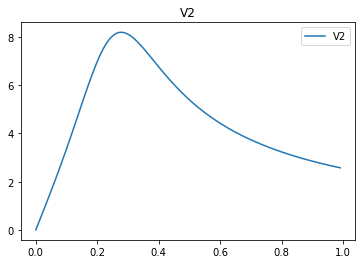

In [5]:
plt.plot(kArray, v2Array, label='V2')
plt.title('V2')
plt.legend()
plt.show()